# Пальчук Г.А., ИВТ 2.1, ЛР 1

In [85]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

%matplotlib inline

In [86]:
from google.colab import files

files.upload()

Saving insurance.csv to insurance (3).csv


{'insurance (3).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [87]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
data.shape

(1338, 7)

In [89]:
data.info()
# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Пропущенных значений нет

In [90]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Перекодировка категорий

In [91]:
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [92]:
data = pd.get_dummies(data, dtype=int)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [93]:
features = data.drop('charges', axis=1).columns
x, y = data[features], data['charges']

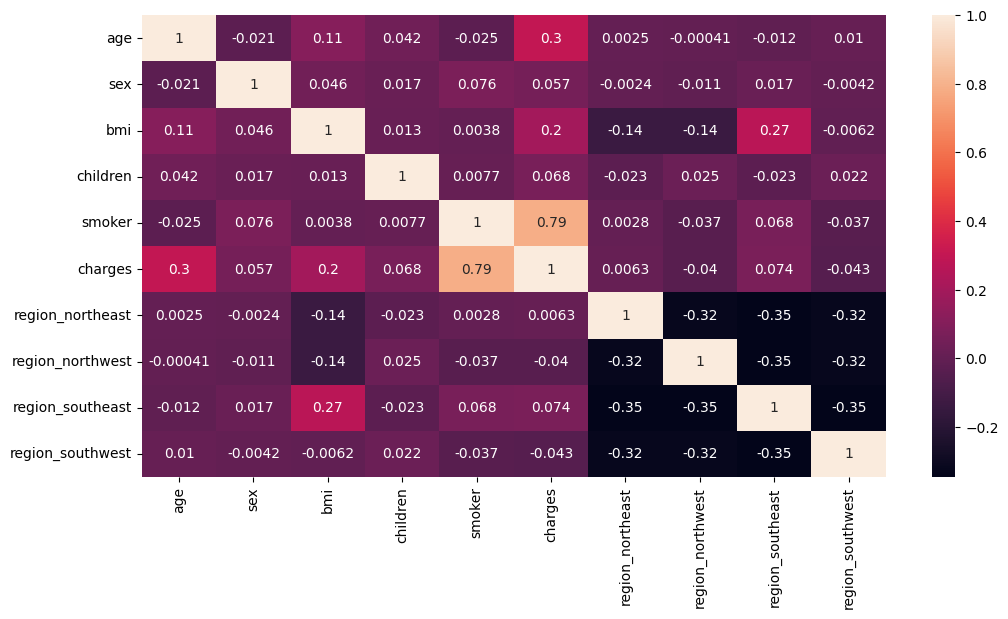

In [94]:
# Тепловая карта
fig = plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True);

In [95]:
temp_data = data.copy()
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features = num_features[0:5]

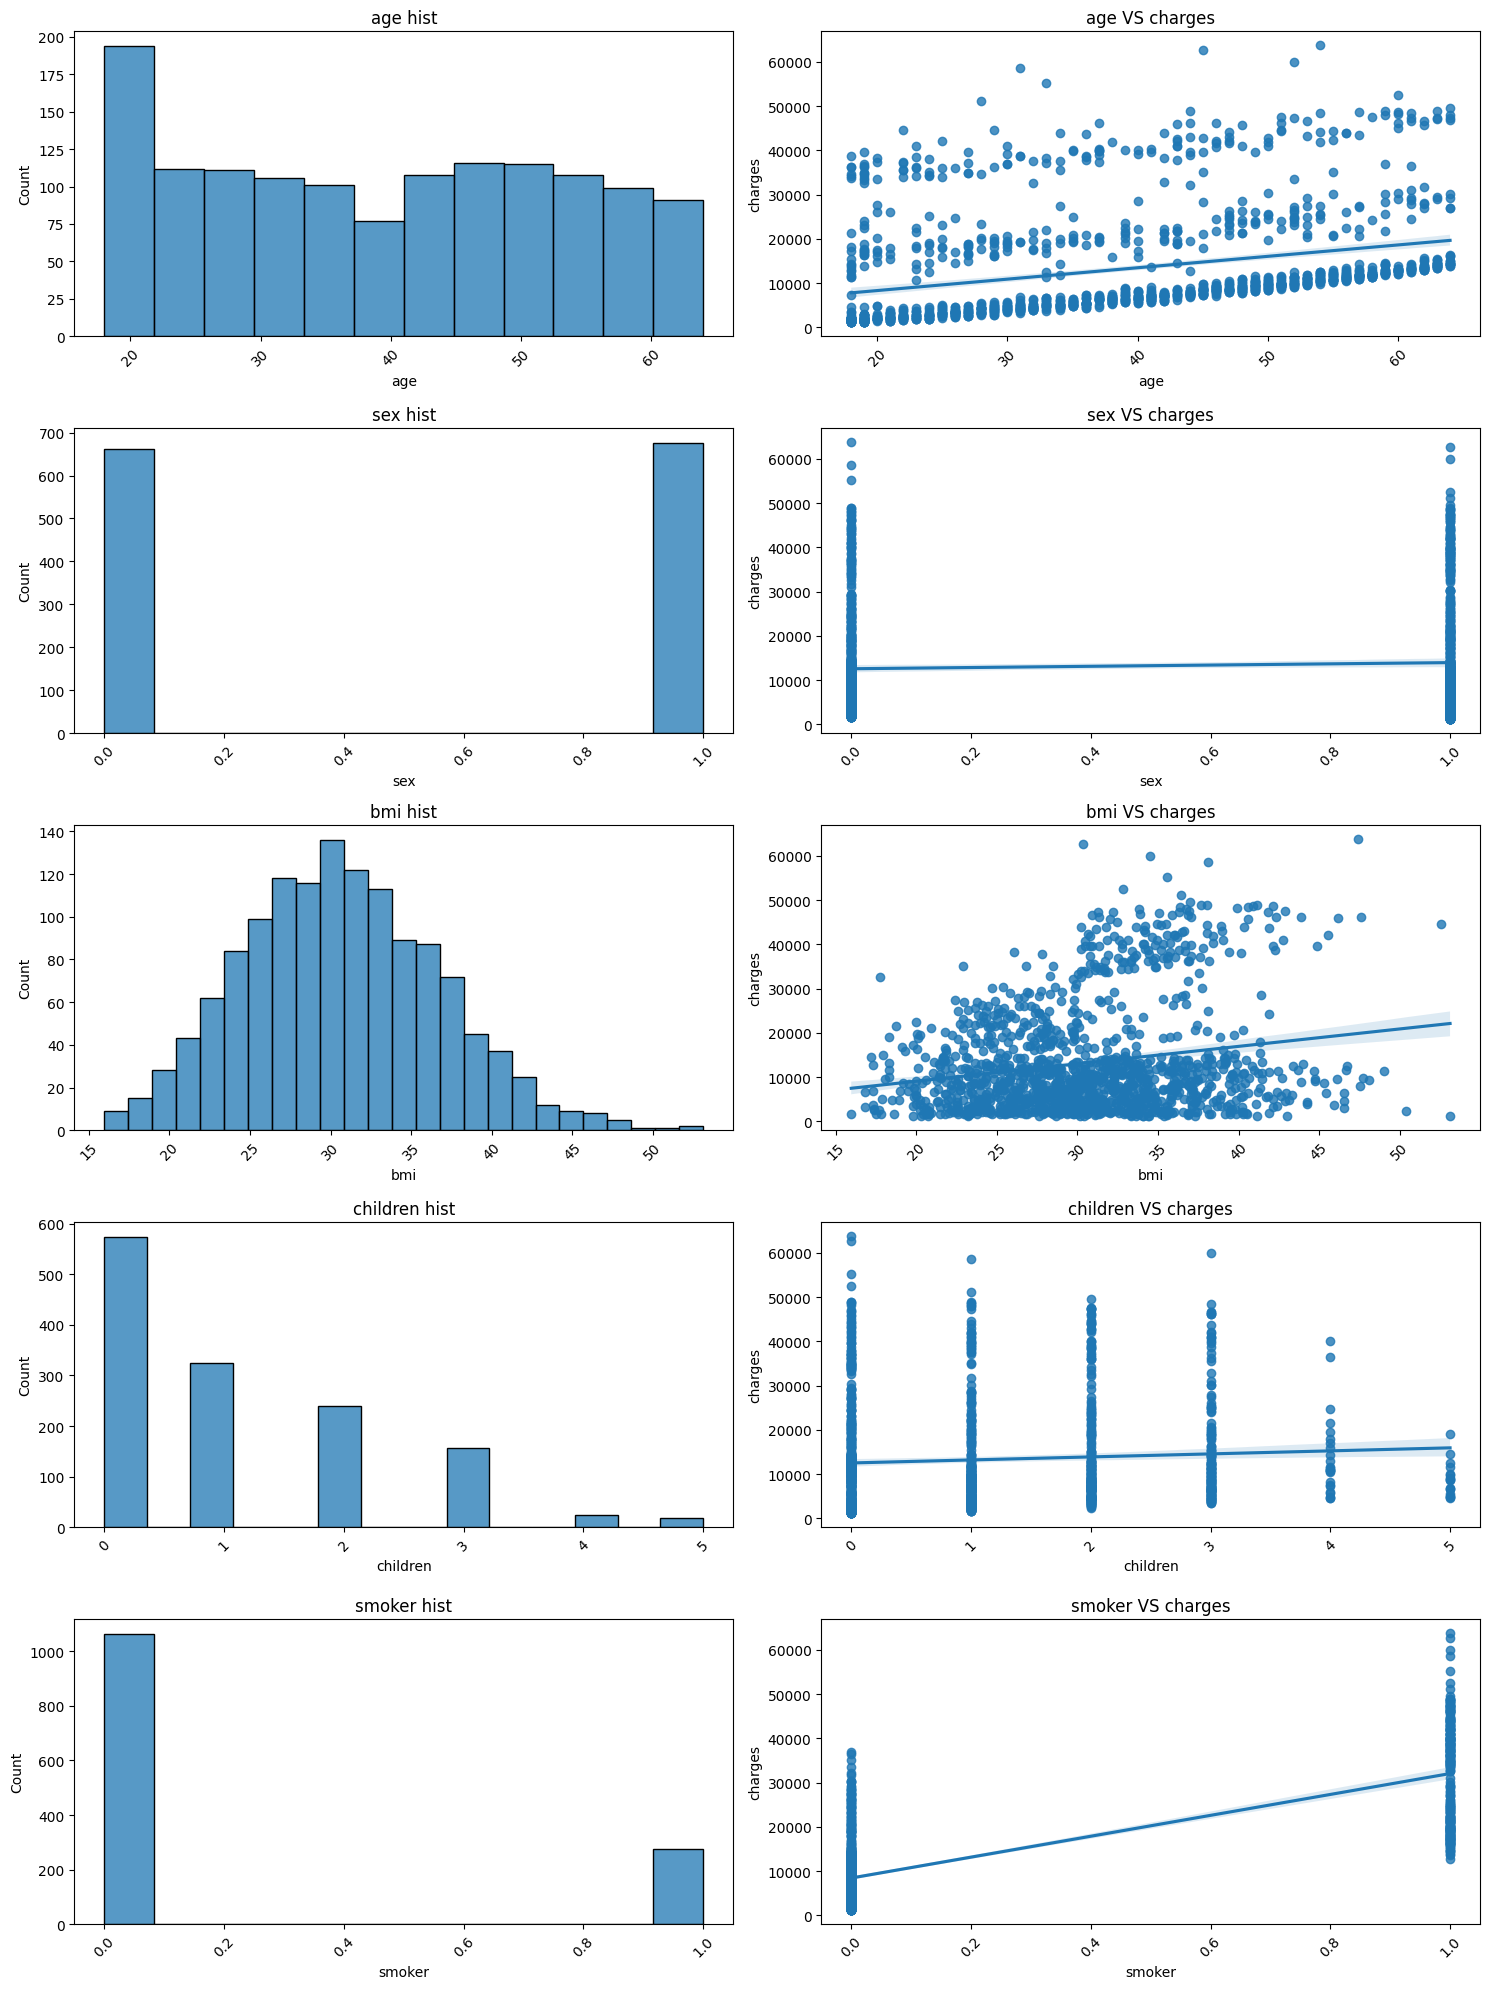

In [96]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS charges'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

# Задание 1
## Разделение на тренировочную и тестовую выборку

In [97]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)

In [98]:
print("Число наблюдений в тестовом наборе данных: ", len(x_test))

Число наблюдений в тестовом наборе данных:  268


# Задание 2
## Обучение модели линейной регрессии аналитическим методом

In [99]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [100]:
# Обучение модели аналитическим методом
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

# Свободный член
print("Свободный член обученной модели: ", round(lr.intercept_, 2), '\n')

#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Свободный член обученной модели:  -12390.8 

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Test MAPE: 46.888


# Задание 3
## Построение диаграммы boxplot

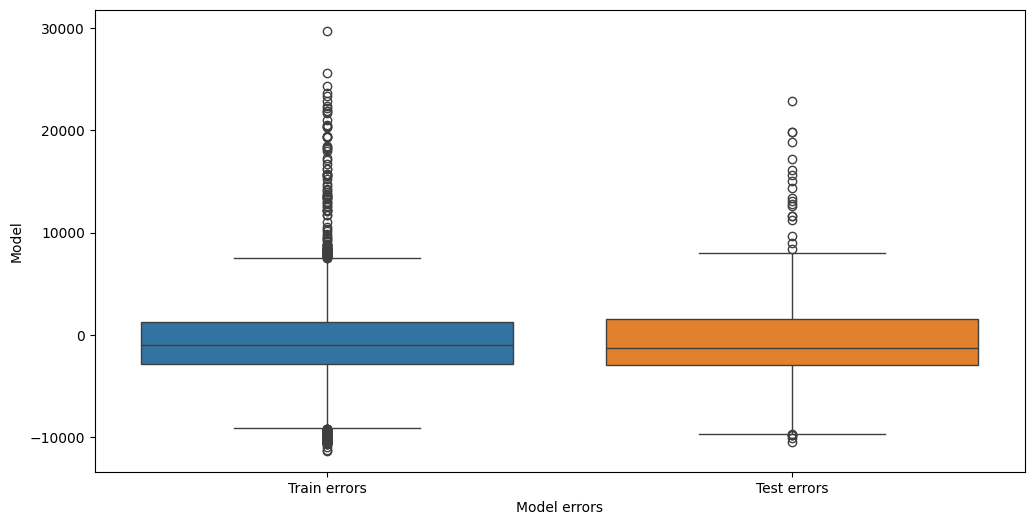

In [101]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Верные ответы: А и С

# Задание №4
## Нормализуйте тренировочную и тестовую выборки с помощью min­-max­-нормализации

In [102]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(x_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Объект PolynomialFeatures с степенью 2 и без добавления смещения
poly = PolynomialFeatures(degree=2, include_bias=False)

# Применяем преобразование к нормализованным данным
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Количество столбцов: ", x_train.shape[1])
print("Количество столбцов после преобразований: ", X_train_poly.shape[1])

Количество столбцов:  9
Количество столбцов после преобразований:  54


# Задание 5
## Обучение модели линейной регрессии на полиноминальных признаках

In [103]:
# Обучаем модель на полиномиальных признаках
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке
y_test_pred_poly = lr_poly.predict(X_test_poly)

# R^2 для тестовой выборки
r2_test_poly = r2_score(y_test, y_test_pred_poly)
print(f"R^2 на тестовой выборке: {r2_test_poly:.3f}")

R^2 на тестовой выборке: 0.867


# Задание 6
## Вывод коэффициентов полученной модели

In [104]:
print("Коэффициенты модели: ", lr_poly.coef_)
print("\nСвободный член (intercept): ", lr_poly.intercept_)

Коэффициенты модели:  [ 2849.35067435  -417.24034999  5935.92169643  4636.08544526
  1139.1491985    351.86496094  -366.48563336   227.08922666
  -212.46855424  8399.63608632   812.46558472   995.68651894
 -1666.91118191   172.50303109  -848.02252419   280.84325571
  1455.92298005  1960.60696278  -417.24034999   647.47475622
 -1238.19812114   257.33745404  -966.67881613   311.8232212
   544.21466602  -306.59942109 -9711.00034091  1559.87212018
 54839.212545    3782.01457236  2765.86075737  -794.72610916
   182.77247586 -2090.61756751 -2233.48411893  2438.06291171
  2463.6574199    410.25306251  -675.88794885  1139.1491985
   318.56157022  -298.80831333  -589.98196067  1709.37790228
   351.86496094     0.             0.             0.
  -366.48563336     0.             0.           227.08922666
     0.          -212.46855424]

Свободный член (intercept):  2227.7345644403576


Вывод: Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.

# Задание 7
## Линейная регрессия с L1-регуляризацией на полиномиальных признаках

In [105]:
# Обучение модели
lasso_model = Lasso(alpha=1.0, max_iter=2000)
lasso_model.fit(X_train_poly, y_train)

# Предсказания на тренировочной и тестовой выборке
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# Метрики
print_metrics(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

Train R^2: 0.842
Train MAE: 2890.473
Train MAPE: 29.401


Test R^2: 0.867
Test MAE: 2719.334
Test MAPE: 30.070


На тестовой выборке R^2: 0.867, MAE: 2719.334, MAPE: 30.070